Task: Map neurons to actions
Represent as time aware systems with no IO:
- The simplified neural net: assume global state=(layer_nb, e), with e=1 for each layer
- The actions with durations
- Show the mapping h from neural net system to action system
- When is the mapping valid wrt the EF?

1. To map neurons to actions and represent them as time-aware systems with no IO, we can extend the previous object-oriented code of the IF neuron to include actions with durations. 

2. By introducing a global state variable (layer_nb, e) to represent the current state of the neural network system, where layer_nb indicates the current layer and e represents the current time step within that layer.

3. We also define a mapping function h that maps the neural network system to the action system. This mapping function will associate each neuron in the neural network with a corresponding action and duration.

4. To determine when the mapping is valid with respect to the Experimental Frame (EF), we need to consider the duration of each action and ensure that it aligns with the time steps defined in the EF. The mapping is valid when the durations of the actions match the durations specified in the EF.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#This code implements a neural network with one hidden layer and one output layer, 
#each neuron has weights, a threshold, and a leak value. 

#We again create a Neuron class
class Neuron:
    def __init__(self, weights, threshold, leak): 
#We initialize the weights, threshold, leak, and  membrane_potential of neuron.
        self.weights = weights
        self.threshold = threshold
        self.leak = leak
        self.membrane_potential = 0.0

    def integrate_fire(self, inputs):
        #We calculate the weighted sum of inputs.
        total = np.dot(inputs, self.weights)
        #We integrate the inputs by adding them to the membrane potential.
        self.membrane_potential += total
        if self.membrane_potential >= self.threshold:
            #We fire an output spike
            output = 1
            #and reset the membrane potential.
            self.membrane_potential = 0.0
        else:
            self.membrane_potential *= self.leak
            output = 0
        return output

In [15]:
#We create a Layer class
class Layer:
    def __init__(self, weights, threshold, leak):
        #We initialize the layer with neurons
        self.neurons = []
        for w in weights:
            #We create a neuron with given weights, threshold and leak.
            self.neurons.append(Neuron(w, threshold, leak))

    def forward(self, inputs):
        #We use function forward to do a forward path through the layer 
        #and calculate the weighted sum of incoming connections.
        outputs = []
        for neuron in self.neurons:
            output = neuron.integrate_fire(inputs)
            outputs.append(output)
        return outputs

In [16]:
class NeuralNetwork:
    def __init__(self, weights_hidden, weights_output, threshold_hidden, threshold_output, leak_hidden, leak_output):
        #We initialize the neural network with hidden layer and output layer.
        self.hidden_layer = Layer(weights_hidden, threshold_hidden, leak_hidden)
        self.output_layer = Layer(weights_output, threshold_output, leak_output)

    def forward(self, inputs):
        #We perform the forward path through the ANN.
        hidden_outputs = self.hidden_layer.forward(inputs)
        output_outputs = self.output_layer.forward(hidden_outputs)
        return output_outputs

In [17]:
#The ExperimentalFrame class simulates the behavior of the neural network over a range of theta values,
#It updates the threshold and leak values of the neurons based on theta, 
#and computes the network's output for each value of theta. 
#The simulate method returns lists of activity and duration values for each theta value.

class ExperimentalFrame:
    def __init__(self, weights_hidden, weights_output, threshold_hidden, threshold_output, leak_hidden, leak_output):
        self.network = NeuralNetwork(weights_hidden, weights_output, threshold_hidden, threshold_output, leak_hidden, leak_output)

    def update_parameters(self, theta):
        #We update threshold and leak of neurons in the network based on the theta value.
        for neuron in self.network.hidden_layer.neurons + self.network.output_layer.neurons:
            neuron.threshold *= theta
            neuron.leak *= theta

    def simulate(self, theta_values): #Simulate the activity and duration based on different theta values.
        activity_list = [] #The list to store the activity for each theta value,
        duration_list = [] #and the duration for each theta value.
        for theta in theta_values:
            self.update_parameters(theta) #We update the parameters based on the current theta.
            inputs = [1.0, 0.0] #We define inputs/voltage
            outputs = self.network.forward(inputs) #We perform forward propagation.
            activity = sum(outputs) #total activity
            duration = len(outputs) #total duration
            activity_list.append(activity) 
            duration_list.append(duration) #and add it to these lists. 
        return activity_list, duration_list #We return activity and duration. 
    

In [18]:
class Action:
    def __init__(self, duration):
        self.duration = duration

#The h function maps the neural network system state to the action system, 
#it takes the current neural_net_state as input and returns a list of actions based on the layer number.
def h(neural_net_state):
    #We map neural network system state to action system.
    actions = []
    layer_nb, e = neural_net_state
    if layer_nb == 1:
        #Actions for inputs
        actions.append(Action(duration=1))
    elif layer_nb == 2:
        #Actions for hidden layer
        actions.append(Action(duration=2))
    elif layer_nb == 3:
        #Actions for outputs 
        actions.append(Action(duration=3))
    return actions

In [19]:
#We define the number of neurons per layer
input_neurons = 2
hidden_neurons = 4
output_neurons = 2

#We define weights for the hidden layer,
hidden_weights = [
    [0.1, 0.2],
    [0.3, 0.4],
    [0.5, 0.6],
    [0.7, 0.8],
]

#same for the output layer.
output_weights = [
    [0.9, 1.0, 1.1, 1.2],
    [1.3, 1.4, 1.5, 1.6],
]

#We define parameters:
threshold_hidden = 0.5
threshold_output = 1.0
leak_hidden = 0.8
leak_output = 0.9

#We create the experimental frame:
exp_frame = ExperimentalFrame(hidden_weights, output_weights, threshold_hidden, threshold_output, leak_hidden, leak_output)

#and define the range of theta values.
theta_values = np.linspace(0, 1, 10)

#We simulate the model for each value of theta,
activity_list, duration_list = exp_frame.simulate(theta_values)

#set the initial global state,
global_state = (1, 1)

#get the actions for the current neural network state.
actions = h(global_state)

#and print the durations of the actions.
for action in actions:
    print(action.duration)

1


UML diagram of code above
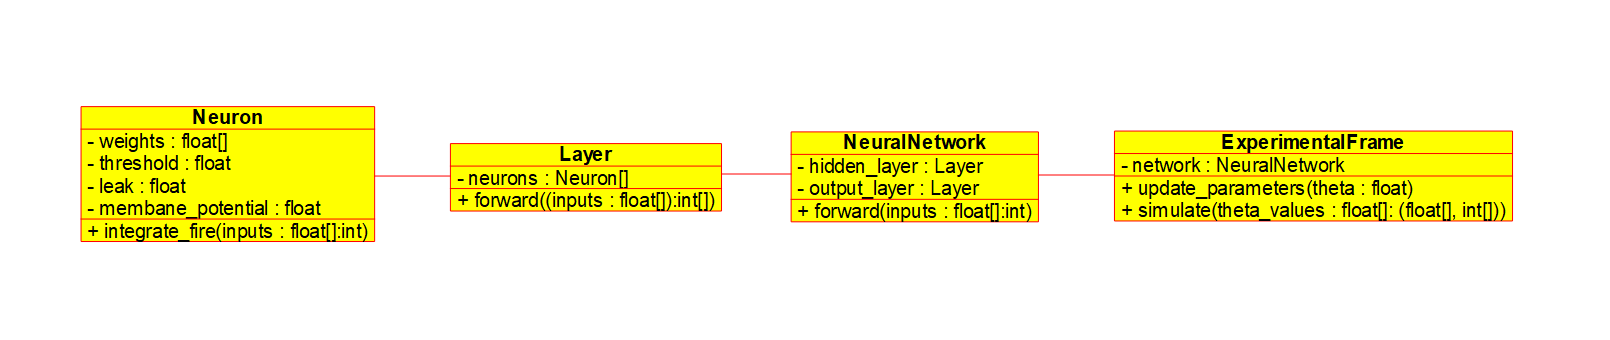

The Neuron class represents a single neuron in the neural network. 
It has attributes such as weights, threshold, leak, and membrane_potential, and function integrate_fire, which calculates the total input, updates the membrane potential, and returns the activation state of the neuron.


The Layer class represents a layer of neurons. 
It contains an array of neurons and has a forward method that activates the neurons in the layer based on the given inputs and returns the activation states of all neurons in the layer.


The NeuralNetwork class represents the neural network itself. 
It consists of a hidden_layer and an output_layer, both instances of the Layer class. The forward method performs the forward pass through the network by activating the hidden layer and then the output layer.


The ExperimentalFrame class represents the experimental frame. 
It contains a network instance of the NeuralNetwork class. The update_parameters method updates the parameters of the network based on a given theta value. The simulate method performs the simulation of the model for a range of theta values and returns the activity and duration lists.